# 线性回归中使用梯度下降法

## 1、目标函数

目标：使$\sum \limits_{i=1}^m{(y^{(i)} - \hat{y}^{(i)})^2}$尽可能小

目标：使$\sum \limits_{i=1}^m{(y^{(i)} - \hat{y}^{(i)})^2}$尽可能小

$$\hat{y}^{(i)} = \theta_0 + \theta_1X_1^{(i)} + \theta_2X_2^{(i)} + ···+ \theta_nX_n^{(i)}$$

$$\sum \limits_{i=1}^m{(y^{(i)} - \theta_0 - \theta_1X_1^{(i)} - \theta_2X_2^{(i)} - ···- \theta_nX_n^{(i)})^2}尽可能小$$

## 2、建立随机样本
* 特征矩阵X（m行n列）


这里的事例是一个特征的向量，实际可以是对应很多特征的矩阵

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed = 666
x = 2 * np.random.random(size = 100)
#np.random.normal(size = 100)表示一个噪音
y = x * 3. + 4. + np.random.normal(size = 100)

In [11]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

* 线性系数$\theta$矩阵（m行1列）

* $$
\theta = \begin{bmatrix}\theta_0 = 4 \\
\theta_1 = 3
\end{bmatrix}$$

In [5]:
y.shape

(100,)

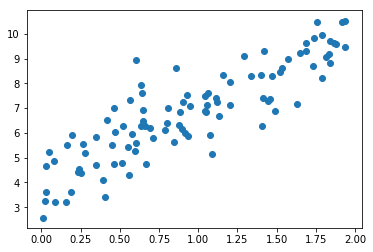

In [6]:
plt.scatter(x , y)

* 建立X_b

In [43]:
#X_b在第一列加上X_0
X_b = np.hstack([np.ones((len(X), 1)), X])
X_b.shape

(100, 2)

## * 线性关系的向量表达形式
$$
\hat{y} = X_b · \Theta
$$

!['截图'](img/目标函数.png "目标函数")

## 2、建立目标函数J

In [7]:
def J(theta, X_b, y):
    '''
    用于计算目标函数的方法
    theta: 参数矩阵
    X_b：特征矩阵(第一列已经增加了为1的X0)
    y：真值矩阵
    '''
    try:
        return np.sum(y - X_b.dot(theta)) ** 2 / len(X_b)
    except:
        return float('inf')

## 3、建立目标函数偏导数dJ

In [8]:
def dJ(theta, X_b, y):
    '''
    计算J对每一个theta求偏导数
    theta：参数矩阵
    '''
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[: , i])
    return res * 2 /len(X_b)

## 4、梯度下降法gradient_decent
* 找到目标函数为最小值时的$\theta$

In [27]:
def gradient_decent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    '''
    根据X_b、y、初始化theta、步长来计算theta
    initial_theta:初始theta
    eta：下降步长
    epsilon：极值，表示导数接近为0的时候到损失函数峰底
    n_iters：最多的循环次数，避免循环条件导致死循环
    X_b:特征向量增加值为1的第一列
    y:真值
    '''
    theta = initial_theta
    i_iters = 0
    while i_iters < n_iters:
        #下降梯度gradient（导数，斜率）
        gradient = dJ(theta, X_b, y)
        last_theta = theta#上一个theta
        theta = theta - eta * gradient#最新theta
        
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_iters += 1
    return theta

In [44]:
X_b.shape

(100, 2)

In [45]:
y.shape

(100,)

In [41]:
#初始化theta(全0)
inital_theta = np.zeros(X_b.shape[1])
#设定步长
eta = 0.01

In [32]:
theta = gradient_decent(X_b, y, inital_theta, eta)
theta

array([4.10870753, 2.88691316])

In [37]:
J(theta, X_b, y)

1.5928554937220838e-06

In [38]:
dJ(theta, X_b, y)

array([-0.00025242,  0.00022689])

### 将梯度下降法封装到线性回归算法中